# **Thư viện**

In [1]:
!pip install pyECLAT

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyECLAT import ECLAT
import warnings

warnings.filterwarnings("ignore")

# **1. Preprocessing & EDA**

## **1.1 Preprocessing**

In [34]:
df = pd.read_csv(r"C:\Users\PC\Downloads\ECLAT\Groceries.csv", index_col=0)
df.tail()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,Chocolate
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True
998,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  Chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 23.4 KB


- The dataset has 999 rows (each row is a transaction) and 16 columns (16 items).
- There are no columns with missing values.
- All columns have the data type bool, where True indicates that the transaction contains the item, and False means it does not.

## **1.2 EDA (Explanatory Data Analysis)**

In [36]:
df.describe()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,Chocolate
count,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,616,615,579,595,592,601,615,589,591,594,598,596,590,610,579,578


- Since the variables are boolean, the number of unique values in all columns is 2: True and False.
- The number of False values is higher than the number of True values in all columns.

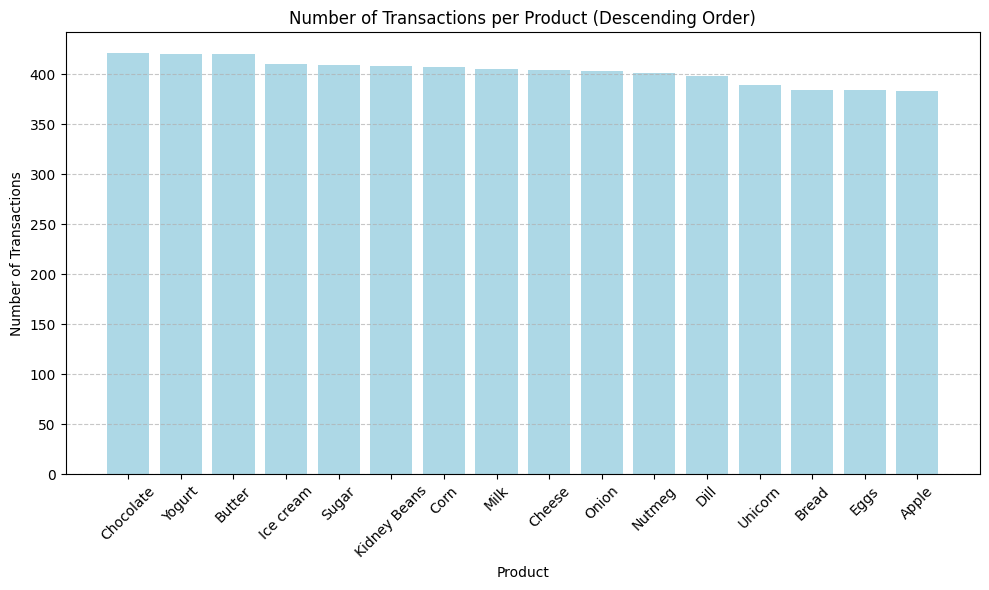

In [37]:
vertical_dict = {}

for index, row in df.iterrows():
    for col in df.columns:
        if row[col]:
            if col not in vertical_dict:
                vertical_dict[col] = []
            vertical_dict[col].append(str(index))

vertical_df = pd.DataFrame(list(vertical_dict.items()), columns=['Item', 'Transactions'])
vertical_df['Transaction Count'] = vertical_df['Transactions'].apply(len)
vertical_df.sort_values(by='Transaction Count', ascending=False, inplace=True)
vertical_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(vertical_df['Item'], vertical_df['Transaction Count'], color='lightblue')
plt.xlabel("Product")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Product (Descending Order)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The products appear with nearly the same frequency.

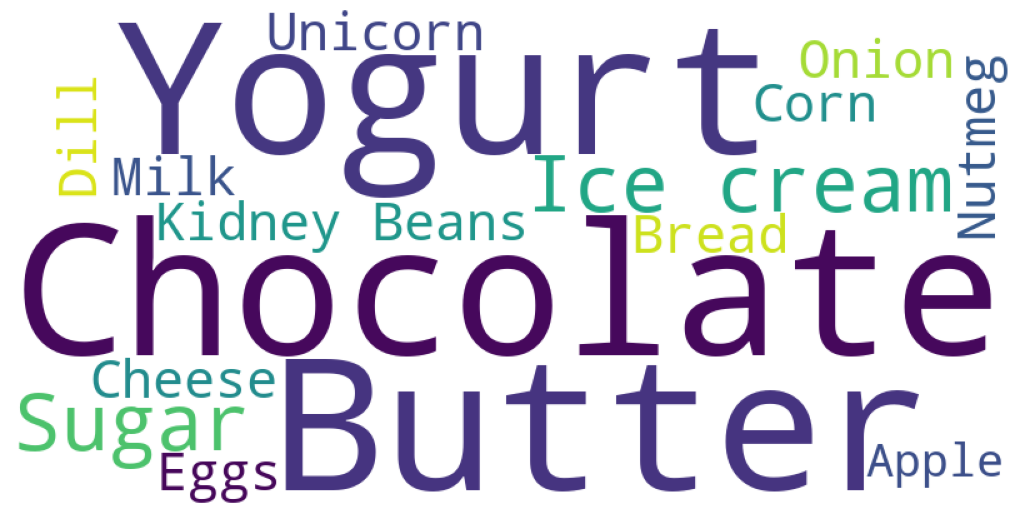

In [38]:
item_counts = dict(zip(vertical_df['Item'], vertical_df['Transaction Count']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(item_counts)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [39]:
df_describe = pd.DataFrame(vertical_df["Transaction Count"].describe()).T
df_describe.insert(1, "median", vertical_df["Transaction Count"].median())
df_describe.insert(2, "mode", vertical_df["Transaction Count"].mode().iloc[0])
df_describe.insert(3, "range", vertical_df["Transaction Count"].max() - vertical_df["Transaction Count"].min())
df_describe

,count,median,mode,range,mean,std,min,25%,50%,75%,max
Transaction Count,16.0,404.5,384,38,402.875,12.595634,383.0,395.75,404.5,409.25,421.0


- According to the descriptive statistics, the range of the number of transactions per product is 38.
- Each product appears in approximately 383 to 421 transactions out of a total of 999 transactions.
- The products appear in about 38% to 42% of all transactions, which is considered quite high. 

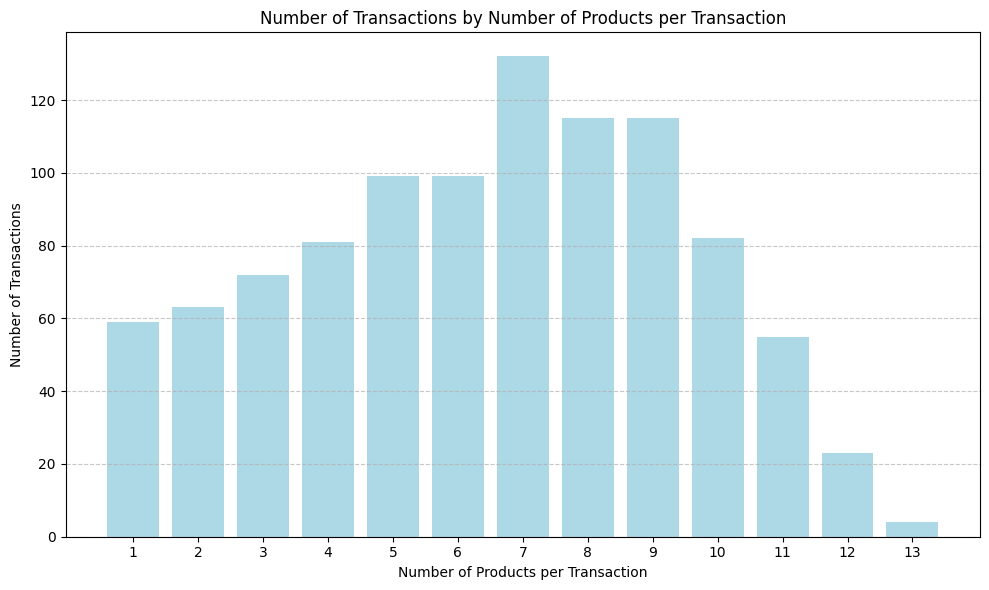

In [40]:
transactions = []
for index, row in df.iterrows():
    items = []
    for col in df.columns:
        if row[col] == True:
            items.append(col)
    transactions.append(items)

items_df = pd.DataFrame({'ID': df.index, 'Items': transactions})
items_per_transaction = items_df['Items'].str.len()
plot_df = pd.DataFrame({'Transaction ID': items_df['ID'], 'Number of Items': items_per_transaction})
plot_df = plot_df.sort_values(by='Number of Items', ascending=False)
transaction_counts = plot_df['Number of Items'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(transaction_counts.index, transaction_counts.values, color='lightblue')
plt.xlabel("Number of Products per Transaction")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions by Number of Products per Transaction")
plt.xticks(np.arange(1, 14), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Transactions with 7 products are the most frequent, followed by transactions with 8 and 9 products.
- Starting from 11 products, the number of transactions decreases, with the lowest number observed at 13 products.
- There are no transactions containing 14 or more products.

# **2.  Identifying Frequent Itemsets**

## **2.1 Choosing an appropriate Minimum Support Threshold**

In [41]:
def calculate_min_sup_for_pairs(transactions, target_ratio=0.1):
    """
    Find a suitable min_sup value so that frequent itemsets of size 2 appear sufficiently often.

    Args:
        transactions (list of list): The transaction dataset.
        target_ratio (float): Target ratio of frequent 2-itemsets compared to total transactions.

    Returns:
        float: The appropriate min_sup value.
    """
    num_transactions = len(transactions)

    # Count the frequency of each item pair
    pair_counts = Counter()
    for transaction in transactions:
        for pair in combinations(sorted(transaction), 2):
            pair_counts[pair] += 1

    # Calculate support for each pair
    pair_supports = [count / num_transactions for count in pair_counts.values()]

    # Calculate the average support and adjust based on target_ratio
    avg_pair_support = np.mean(pair_supports)
    min_sup = avg_pair_support * target_ratio

    print(f"Total number of transactions: {num_transactions}")
    print(f"Number of product pairs: {len(pair_counts)}")
    print(f"Average support of product pairs: {avg_pair_support:.4f}")
    print(f"Selected Min Support: {min_sup:.4f}")

    return min_sup

min_sup = round(calculate_min_sup_for_pairs(transactions, target_ratio=0.6), 2)
print(f"Final Min Support: {min_sup}")

Total number of transactions: 999
Number of product pairs: 120
Average support of product pairs: 0.1828
Selected Min Support: 0.1097
Final Min Support: 0.11


## **2.2 Implementing the ECLAT algorithm using the pyECLAT library**

> https://pypi.org/project/pyECLAT/

In [42]:
# Convert to the format where each row represents a customer's transaction
transactions = []
for index, row in df.iterrows():
    items = []
    for col in df.columns:
        if row[col] == True:
            items.append(col)
    transactions.append(items)

df1 = pd.DataFrame(transactions)
df1 = df1.replace({None: np.nan})
df1.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
994,Bread,Eggs,Unicorn,Chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,Apple,Corn,Kidney Beans,Milk,Nutmeg,Yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Apple,Corn,Dill,Sugar,Chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Butter,Cheese,Corn,Eggs,Ice cream,Kidney Beans,Nutmeg,Sugar,Yogurt,Chocolate,NaN,NaN,NaN
998,Milk,Chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
eclat_instance = ECLAT(data=df1, verbose=True)

100%|██████████| 16/16 [00:00<00:00, 3202.98it/s]


In [48]:
eclat_instance.df_bin.head()

,Bread,Dill,Unicorn,Ice cream,Cheese,Yogurt,Eggs,Corn,Milk,Butter,Nutmeg,Apple,Sugar,Chocolate,Onion,Kidney Beans
0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
3,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


The eclat_instance of pyECLAT library provides two methods: fit() and fit_all(). 

The author chooses to use the fit_all() method because the goal is to analyze the entire dataset in order to gain deeper insights into all frequent itemsets.  

The fit_all() method returns a dictionary where:
- Key: The name of the itemset (a combination of products)
- Value: The support value (the frequency of occurrence of that itemset across all transactions)



In [44]:
get_ECLAT_indexes, get_ECLAT_supports = eclat_instance.fit_all(min_support=min_sup,
                                            separator=' & ',
                                            verbose=True)

Combination 1 by 1


16it [00:00, 230.57it/s]


Combination 2 by 2


120it [00:00, 241.46it/s]


Combination 3 by 3


560it [00:01, 448.40it/s]


Combination 4 by 4


1820it [00:04, 437.04it/s]

Stopping in combination 4 by 4. All supports = 0.


In [ ]:
frequent_itemsets_ec = []
for item, support in get_ECLAT_supports.items():    
    frequent_itemsets_ec.append((item, support))
frequent_itemsets_ec.sort(key=lambda x: x[1])
frequent_itemsets_ec_df = pd.DataFrame(frequent_itemsets_ec, columns=['Itemset', 'Support'])
frequent_itemsets_ec_df

,Itemset,Support
0,Ice cream & Butter & Kidney Beans,0.110110
1,Dill & Milk & Chocolate,0.114114
2,Bread & Apple,0.154154
3,Eggs & Apple,0.156156
4,Bread & Eggs,0.157157
...,...,...
133,Sugar,0.409409
134,Ice cream,0.410410
135,Yogurt,0.420420
136,Butter,0.420420


In [ ]:
# Split the 'Itemset' column and convert each itemset to frozenset
frequent_itemsets_ec_df['Itemset'] = frequent_itemsets_ec_df['Itemset'].str.split(' & ')
frequent_itemsets_ec_df['Itemset'] = frequent_itemsets_ec_df['Itemset'].apply(lambda x: frozenset(x))
frequent_itemsets_ec = frequent_itemsets_ec_df.values.tolist()

# **3. Generating Association Rules**

## **3.1 Calculating Confidence for Frequent Itemsets**

In [83]:
def calculate_confidence(frequent_itemsets):
    """
    Calculate the confidence metric for all association rules generated from frequent itemsets.

    Parameters:
        - frequent_itemsets: List of tuples (frozenset itemset, support).

    Returns:
        - rules: List of tuples (frozenset(lhs), frozenset(rhs), confidence, support).
    """
    # Convert frequent_itemsets to dictionary for easy access
    support_dict = {itemset: support for itemset, support in frequent_itemsets}

    rules = []
    for itemset, itemset_support in frequent_itemsets:
        if len(itemset) > 1:  # Only consider itemsets with 2 or more items
            for item in itemset:
                # Create left-hand side (lhs) and right-hand side (rhs)
                lhs = itemset - frozenset([item])
                rhs = frozenset([item])

                # Calculate confidence
                lhs_support = support_dict.get(lhs, 0)
                if lhs_support > 0:  # Avoid division by zero
                    confidence = itemset_support / lhs_support
                    rules.append((lhs, rhs, confidence, itemset_support))
    return rules

# Calculate association rules and create DataFrame
rules = calculate_confidence(frequent_itemsets_ec)
rules_df = pd.DataFrame(rules, columns=['Left-hand side', 'Right-hand side', 'Confidence', 'Support'])

rules_df

,Left-hand side,Right-hand side,Confidence,Support
0,"(Kidney Beans, Ice cream)",(Butter),0.561224,0.110110
1,"(Butter, Ice cream)",(Kidney Beans),0.531401,0.110110
2,"(Butter, Kidney Beans)",(Ice cream),0.544554,0.110110
3,"(Chocolate, Milk)",(Dill),0.540284,0.114114
4,"(Dill, Milk)",(Chocolate),0.600000,0.114114
...,...,...,...,...
241,(Butter),(Kidney Beans),0.480952,0.202202
242,(Ice cream),(Butter),0.504878,0.207207
243,(Butter),(Ice cream),0.492857,0.207207
244,(Milk),(Chocolate),0.520988,0.211211


## **3.2 Choosing an appropriate Minimum Confidence Threshold**

Determine an appropriate Min Confidence threshold based on the confidence distribution:
- Calculate the confidence of all association rules from the dataset.
- Identify the confidence value at the 75th percentile.
- Set the minimum confidence threshold at this level or higher to retain the most reliable rules.

In [70]:
rules_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Confidence,246.0,0.455855,0.029035,0.382927,0.437153,0.454762,0.471848,0.600000
Support,246.0,0.181100,0.015762,0.110110,0.173423,0.183183,0.191191,0.211211


Adjust the confidence threshold from 0.47 to 0.6 to identify a suitable number of strong association rules for analysis.

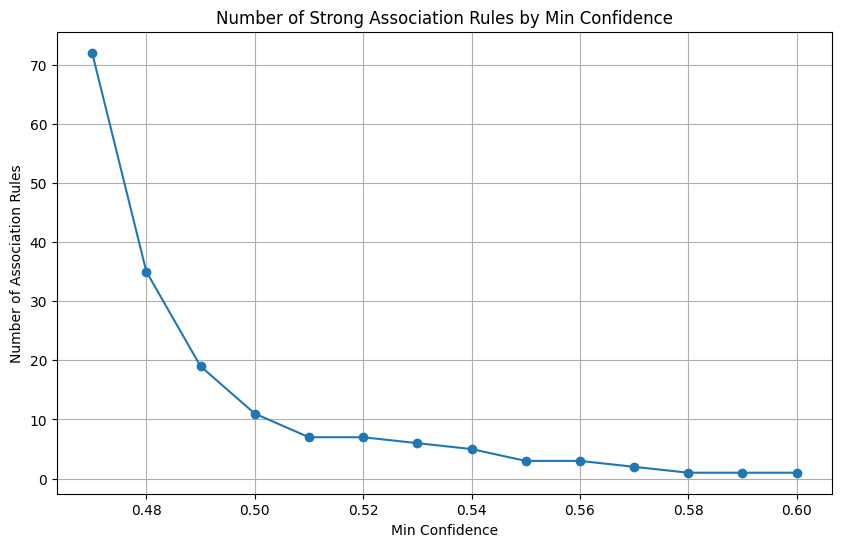

,Min Confidence,Number of Strong Association Rules
0,0.47,72
1,0.48,35
2,0.49,19
3,0.50,11
4,0.51,7
5,0.52,7
6,0.53,6
7,0.54,5
8,0.55,3
9,0.56,3


In [71]:
min_conf_range = np.arange(0.47, 0.6001, 0.01)
num_rules_list = []

for min_conf in min_conf_range:
    filtered_rules_df = rules_df[np.isclose(rules_df['Confidence'], min_conf) | (rules_df['Confidence'] > min_conf)]
    num_rules_list.append(len(filtered_rules_df))

plt.figure(figsize=(10, 6))
plt.plot(min_conf_range, num_rules_list, marker='o', linestyle='-')
plt.xlabel('Min Confidence')
plt.ylabel('Number of Association Rules')
plt.title('Number of Strong Association Rules by Min Confidence')
plt.grid(True)
plt.show()

data = {'Min Confidence': min_conf_range, 'Number of Strong Association Rules': num_rules_list}
df_rules = pd.DataFrame(data)
df_rules

In [74]:
min_conf = 0.50
filtered_rules_df = rules_df[rules_df['Confidence'] >= min_conf]
filtered_rules_df.reset_index(drop=True, inplace=True)
filtered_rules_df

,LHS,RHS,Confidence,Support
0,"(Kidney Beans, Ice cream)",(Butter),0.561224,0.110110
1,"(Butter, Ice cream)",(Kidney Beans),0.531401,0.110110
2,"(Butter, Kidney Beans)",(Ice cream),0.544554,0.110110
3,"(Chocolate, Milk)",(Dill),0.540284,0.114114
4,"(Dill, Milk)",(Chocolate),0.600000,0.114114
5,"(Dill, Chocolate)",(Milk),0.572864,0.114114
6,(Bread),(Yogurt),0.502604,0.193193
7,(Dill),(Chocolate),0.500000,0.199199
8,(Ice cream),(Butter),0.504878,0.207207
9,(Milk),(Chocolate),0.520988,0.211211


The author selected the Min Confidence threshold of 0.50 based on the Elbow method, as the number of strong association rules drops significantly and stabilizes beyond this point.

# **4. Evaluating Association Rules and identifying Strong Rules using the LIFT metric**

In [79]:
def calculate_lift(frequent_itemsets, rules, num_of_transactions):
    """
    Calculate the lift metric for all association rules based on the list of frequent_itemsets and rules.

    Parameters:
        - frequent_itemsets: A list of tuples (frozenset itemset, support).
        - rules: A list of tuples (frozenset(lhs), frozenset(rhs), confidence).
        - num_of_transactions: Total number of transactions.

    Returns:
        - rules_with_lift: A list of tuples (frozenset(lhs), frozenset(rhs), confidence, support, lift).
    """
    # Convert frequent_itemsets to a dictionary for easy access to support values
    if frequent_itemsets[0][1] < 1:  # If frequent_itemsets contains (itemset, support)
        support_dict = {itemset: support for itemset, support in frequent_itemsets}
    else:  # If frequent_itemsets contains (itemset, frequency)
        support_dict = {itemset: freq / num_of_transactions for itemset, freq in frequent_itemsets}

    rules_with_lift = []
    for lhs, rhs, confidence, support in rules:
        # Calculate lift = confidence / support(rhs)
        rhs_support = support_dict.get(rhs, 0)
        if rhs_support > 0:  # Avoid division by zero
            lift = confidence / rhs_support
            rules_with_lift.append((lhs, rhs, confidence, support, lift))

    return rules_with_lift

rules_with_lift = calculate_lift(frequent_itemsets_ec, rules, len(transactions))

rules_with_lift_df = pd.DataFrame(rules_with_lift, columns=['Left-hand side', 'Right-hand side', 'Confidence', 'Support', 'Lift'])
rules_with_lift_df

,Left-hand side,Right-hand side,Confidence,Support,Lift
0,"(Kidney Beans, Ice cream)",(Butter),0.561224,0.110110,1.334913
1,"(Butter, Ice cream)",(Kidney Beans),0.531401,0.110110,1.301151
2,"(Butter, Kidney Beans)",(Ice cream),0.544554,0.110110,1.326853
3,"(Chocolate, Milk)",(Dill),0.540284,0.114114,1.356141
4,"(Dill, Milk)",(Chocolate),0.600000,0.114114,1.423753
...,...,...,...,...,...
241,(Butter),(Kidney Beans),0.480952,0.202202,1.177626
242,(Ice cream),(Butter),0.504878,0.207207,1.200889
243,(Butter),(Ice cream),0.492857,0.207207,1.200889
244,(Milk),(Chocolate),0.520988,0.211211,1.236263


In [80]:
# Filter out rules with LIFT > 1
filtered_rules_lift = rules_with_lift_df[rules_with_lift_df['Lift'] > 1]
filtered_rules_lift

,Left-hand side,Right-hand side,Confidence,Support,Lift
0,"(Kidney Beans, Ice cream)",(Butter),0.561224,0.110110,1.334913
1,"(Butter, Ice cream)",(Kidney Beans),0.531401,0.110110,1.301151
2,"(Butter, Kidney Beans)",(Ice cream),0.544554,0.110110,1.326853
3,"(Chocolate, Milk)",(Dill),0.540284,0.114114,1.356141
4,"(Dill, Milk)",(Chocolate),0.600000,0.114114,1.423753
...,...,...,...,...,...
241,(Butter),(Kidney Beans),0.480952,0.202202,1.177626
242,(Ice cream),(Butter),0.504878,0.207207,1.200889
243,(Butter),(Ice cream),0.492857,0.207207,1.200889
244,(Milk),(Chocolate),0.520988,0.211211,1.236263


There are 244/246 association rules with LIFT > 1.

In [82]:
# Filter out rules with LIFT > 1 and confidence >= min_conf
filtered_rules_lift_1 = rules_with_lift_df[(rules_with_lift_df['Lift'] > 1) & (rules_with_lift_df['Confidence'] >= min_conf)]
filtered_rules_lift_1.reset_index(drop=True, inplace=True)
filtered_rules_lift_1

,Left-hand side,Right-hand side,Confidence,Support,Lift
0,"(Kidney Beans, Ice cream)",(Butter),0.561224,0.110110,1.334913
1,"(Butter, Ice cream)",(Kidney Beans),0.531401,0.110110,1.301151
2,"(Butter, Kidney Beans)",(Ice cream),0.544554,0.110110,1.326853
3,"(Chocolate, Milk)",(Dill),0.540284,0.114114,1.356141
4,"(Dill, Milk)",(Chocolate),0.600000,0.114114,1.423753
5,"(Dill, Chocolate)",(Milk),0.572864,0.114114,1.413065
6,(Bread),(Yogurt),0.502604,0.193193,1.195480
7,(Dill),(Chocolate),0.500000,0.199199,1.186461
8,(Ice cream),(Butter),0.504878,0.207207,1.200889
9,(Milk),(Chocolate),0.520988,0.211211,1.236263


The 11 strong association rules found (with min_sup = 0.11 and min_conf = 0.5) all have a LIFT greater than 1.